Consider a Quantum Master equation for a weakly driven two-level atom in a zero temperature reservoir:

$$\frac{d \rho}{dt}=\mathcal{L}\rho,$$

where

$$\mathcal{L}\rho =-\imath[H_s,\rho]$$

$$H_s = \frac{\Delta}{2}\sigma_z+ \Omega \sigma_x,$$

where $\Delta = \omega_0-\omega_D$ and $\Omega$ is the amplitude of the driving field

a) Derive the formula for the master equation / equation of motion

b) Find the corresponding equations for the observables $X,Y,Z$ and solve the differential equations using SciPy.


#### part a solution

![solve](./img/IMG_0701.jpg)

#### part b solution

![solve](./img/IMG_0702.jpg)

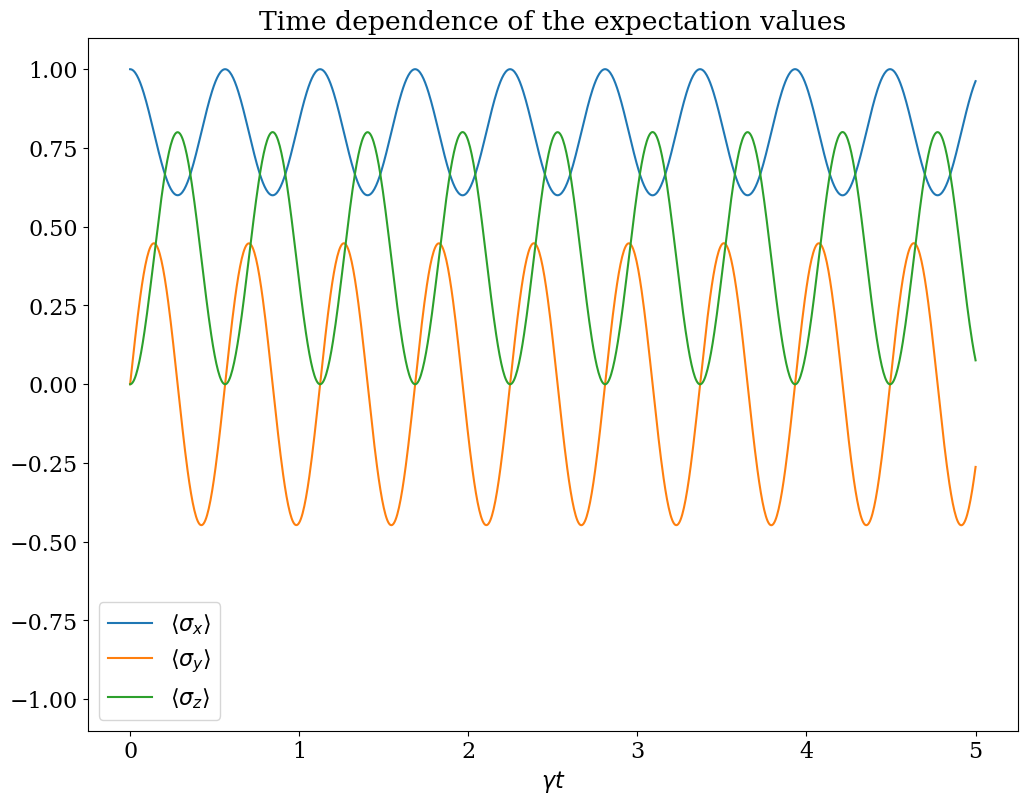

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def funcDO(t,y, delta=1, omega=1, gamma = 0.1):
    X, Y, Z = y
    dx = -(delta/2)*Y
    dy = (delta/2)*X-omega*Z
    dz = omega * Y
    return(np.array([dx, dy, dz], dtype=float))

t_i = 0
t_f = 50
nsteps = 1000

h = (t_f-t_i)/nsteps

X0 = 1.0
Y0 = 0.0
Z0 = 0.0

R0=np.array([X0,Y0,Z0],dtype=float)
t_span=(t_i,t_f)
solSciPyO=scipy.integrate.solve_ivp(funcDO,t_span,R0,dense_output=True)

tvec=np.linspace(t_i,t_f,nsteps+1)
Xt, Yt, Zt = solSciPyO.sol(tvec)

import matplotlib
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16,'font.family':'serif'})
fig, ax = plt.subplots(figsize=(12, 9))

trange = 0.1*np.linspace(t_i,t_f,nsteps+1)
plt.plot(trange,np.real(Xt), label = r'$\langle \sigma_x \rangle$')
plt.plot(trange,np.real(Yt), label = r'$\langle \sigma_y \rangle$')
plt.plot(trange,np.real(Zt), label = r'$\langle \sigma_z \rangle$')

plt.title('Time dependence of the expectation values')
plt.xlabel('$\gamma t$')
plt.ylim(-1.1, 1.1)
plt.legend(loc = "best",numpoints=1,frameon=True)

plt.show()